In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip 'drive/MyDrive/dataset.zip'

In [ ]:
# Instalar la biblioteca ultralytics
!pip install ultralytics

In [ ]:
import os
directory_path = '/content/train'  # Reemplazar esto con la ruta al directorio

if os.path.exists(directory_path):
    print("El directorio existe.")
else:
    print("El directorio no existe.")

In [ ]:
from ultralytics import YOLO


model = YOLO("yolov8n.yaml") # Se carga el modelo YOLOv8n con la configuración de yolov8n.yaml

model.train(data="config.yaml", epochs=100) # Se entrena el modelo con los datos de config.yaml durante 100 épocas
metrics = model.val() # Se obtienen las métricas de validación


In [ ]:
results = model("basura.jpg")  # Predecimos la imagen basura.jpg
path = model.export(format="onnx")  # Exportamos el modelo a formato ONNX


image 1/1 /content/basura.jpg: 640x640 1 trash, 13.0ms
Speed: 3.9ms preprocess, 13.0ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 72.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.4s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 12.2s, saved as 'runs/detect/train8/weights/best.onnx' (11.7 MB)

Export complete (13.9s)
Results saved to /content/runs/detect/train8/weights
Predict:         yolo predict task=detect model=runs/detect/train8/weig


image 1/1 /content/botella_pet.jpg: 416x640 1 plastic, 105.3ms
Speed: 3.9ms preprocess, 105.3ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 640)


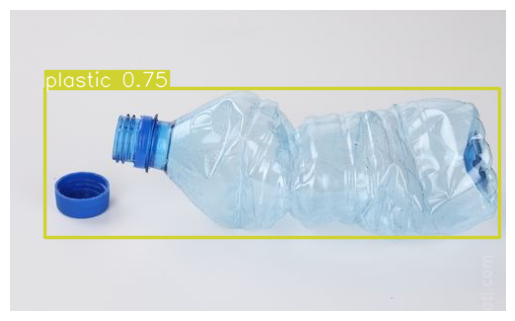

In [ ]:
results = model("botella_pet.jpg")  # Predecimos la imagen botella_pet.jpg

import matplotlib.pyplot as plt
import cv2
# Asegúrate de que 'results' no esté vacío y es del tipo esperado
if results and isinstance(results, list):
    for result in results:
        # Renderizar la imagen con las predicciones
        img_with_boxes = result.plot()

        # Convertir la imagen de BGR a RGB (si es necesario)
        img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen
        plt.imshow(img_with_boxes_rgb)
        plt.axis('off')  # Ocultar los ejes
        plt.show()
else:
    print("No se encontraron resultados.")


## Metricas de Prueba

In [ ]:
!ls /content/runs

ls: cannot access '/content/runs/detected': No such file or directory


In [ ]:
import shutil

folder_path = '/content/runs' # Reemplazar esto con la ruta al directorio
output_filename = '/content/runs.zip' # Reemplazar esto con la ruta al archivo de salida

shutil.make_archive(output_filename.replace('.zip', ''), 'zip', folder_path) # Comprimir el directorio en un archivo ZIP

'/content/runs.zip'

In [ ]:
metrics = model.val()  # evaluar el rendimiento del modelo en el conjunto de validación

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|██████████| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.34it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 1.0ms preprocess, 5.4ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train84


Precisión (mAP@50): 0.9010380511524998 <p>
Recall (mAP@50): 0.9010380511524998 <p>
F1-Score: 0.9010380511524998 <p>
IoU (mAP@50): 0.9010380511524998 <p>
mAP@50: 0.9010380511524998 <p>
mAP: 0.862367002585864 <p>

## Intento de Salida de Metricas

In [ ]:
from ultralytics.utils.metrics import Metric # Importar la clase Metric
metrics = model.val() # Evaluar el rendimiento del modelo en el conjunto de validación

# Inicializar Metric
metric = Metric()

# Actualizar las métricas con los resultados de la evaluación
metric.update(metrics)

# Acceder a diferentes métricas
mAP = metric.map  # mAP sobre umbrales IoU de 0,5-0,95 en pasos de 0,05
ap50 = metric.ap50  # AP50 para todas las clases

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/valid/labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|██████████| 504/504 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.25it/s]


                   all        504        505      0.841      0.827      0.901      0.862
             cardboard         84         84       0.88       0.87      0.957      0.927
                 glass         89         89      0.786      0.876       0.92      0.858
                 metal         86         86      0.895      0.837      0.945      0.936
                 paper        113        113      0.884      0.867      0.948      0.909
               plastic        103        103      0.954      0.811      0.938      0.887
                 trash         29         30      0.645        0.7      0.698      0.657
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train85


TypeError: cannot unpack non-iterable DetMetrics object